<a href="https://colab.research.google.com/github/fadhilahmad11/Machine-Learning/blob/main/03.%20Week%203/Income_Classification_using_K_NN_and_Decision_Tree_W3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading


In [14]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('income.csv')

display(df.head())
print(df.shape)

Saving income.csv to income (2).csv


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(48842, 15)


## Data exploration



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Missing Value Percentages:
 age               0.000000
workclass         1.971664
fnlwg

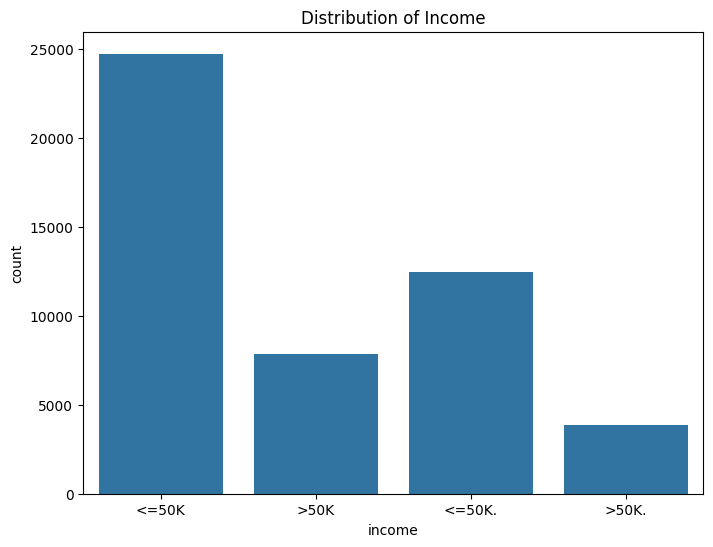

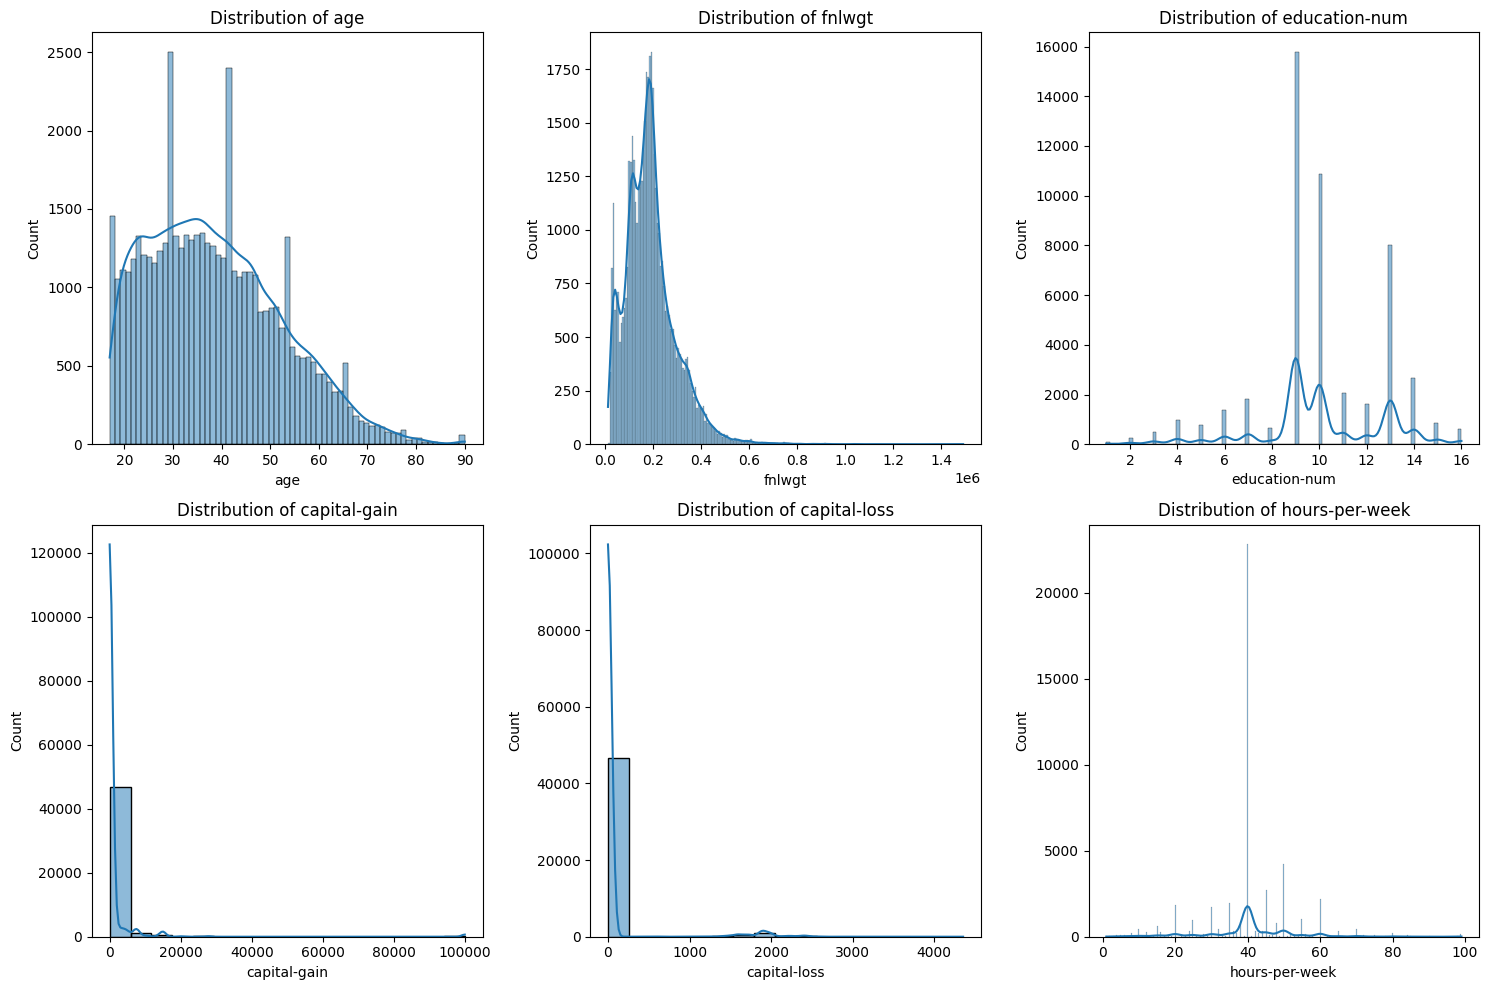

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.info())
missing_percentages = df.isnull().sum() / len(df) * 100
print("\nMissing Value Percentages:\n", missing_percentages)

print("\nDescriptive Statistics:\n", df.describe())

print("\nTarget Variable Distribution:\n", df['income'].value_counts(normalize=True) * 100)
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.show()


numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## Data cleaning

### Subtask:
Clean the data by handling missing values and converting categorical features into numerical representations.


In [16]:
import pandas as pd

# Fill missing values with the mode for specified columns
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Convert categorical features to numerical representations
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label encode the target variable
income_mapping = {'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1}
df['income'] = df['income'].map(income_mapping)

# Verify data cleaning
print(df.info())
print("\nMissing Value Percentages:\n", df.isnull().sum() / len(df) * 100)
print("\nFirst few rows of the cleaned DataFrame:\n")
display(df.head())
print("\nUnique values of the target variable 'income' after label encoding:\n")
print(df['income'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 101 entries, age to native-country_Yugoslavia
dtypes: bool(94), int64(7)
memory usage: 7.0 MB
None

Missing Value Percentages:
 age                               0.0
fnlwgt                            0.0
education-num                     0.0
capital-gain                      0.0
capital-loss                      0.0
                                 ... 
native-country_Thailand           0.0
native-country_Trinadad&Tobago    0.0
native-country_United-States      0.0
native-country_Vietnam            0.0
native-country_Yugoslavia         0.0
Length: 101, dtype: float64

First few rows of the cleaned DataFrame:



<ipython-input-16-c0c82b0e4dcb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Unique values of the target variable 'income' after label encoding:

[0 1]


## Data splitting



In [17]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('income', axis=1)
y = df['income']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Print value counts of y_train and y_test to check class distribution
print("\ny_train value counts:\n", y_train.value_counts())
print("\ny_test value counts:\n", y_test.value_counts())

X_train shape: (39073, 100)
X_test shape: (9769, 100)
y_train shape: (39073,)
y_test shape: (9769,)

y_train value counts:
 income
0    29724
1     9349
Name: count, dtype: int64

y_test value counts:
 income
0    7431
1    2338
Name: count, dtype: int64


## Feature engineering



In [18]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding one-hot encoded features)
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the numerical features of the training data
scaler.fit(X_train[numerical_features])

# Transform both training and test data
X_train_scaled = scaler.transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Replace original numerical columns with scaled values
X_train[numerical_features] = X_train_scaled
X_test[numerical_features] = X_test_scaled

## Model training



In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate classifiers
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)

# Train classifiers
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Model evaluation




In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

y_pred_knn = knn_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print("Confusion Matrix (k-NN):\n", cm_knn)
print("\nConfusion Matrix (Decision Tree):\n", cm_dt)

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_true,y_pred))
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")
    return fpr, tpr, roc_auc


fpr_knn, tpr_knn, roc_auc_knn = evaluate_model(y_test, y_pred_knn, "k-NN")
fpr_dt, tpr_dt, roc_auc_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")

Confusion Matrix (k-NN):
 [[6703  728]
 [ 927 1411]]

Confusion Matrix (Decision Tree):
 [[6482  949]
 [ 907 1431]]

k-NN Metrics:
Accuracy: 0.8306
Precision: 0.6597
Recall: 0.6035
F1-score: 0.6303
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7431
           1       0.66      0.60      0.63      2338

    accuracy                           0.83      9769
   macro avg       0.77      0.75      0.76      9769
weighted avg       0.83      0.83      0.83      9769

AUC: 0.7528

Decision Tree Metrics:
Accuracy: 0.8100
Precision: 0.6013
Recall: 0.6121
F1-score: 0.6066
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      7431
           1       0.60      0.61      0.61      2338

    accuracy                           0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769

AUC: 0.7422


## Model optimization


In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
knn_param_grid = {'n_neighbors': range(1, 21)}
dt_param_grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 11)}

# Create GridSearchCV objects
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='f1')
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='f1')

# Fit GridSearchCV objects to the training data
knn_grid_search.fit(X_train, y_train)
dt_grid_search.fit(X_train, y_train)

# Extract best hyperparameters and estimators
best_knn_model = knn_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_

# Print best hyperparameters
print("Best hyperparameters for k-NN:", knn_grid_search.best_params_)
print("Best hyperparameters for Decision Tree:", dt_grid_search.best_params_)

Best hyperparameters for k-NN: {'n_neighbors': 13}
Best hyperparameters for Decision Tree: {'max_depth': 14, 'min_samples_split': 7}


## Data visualization


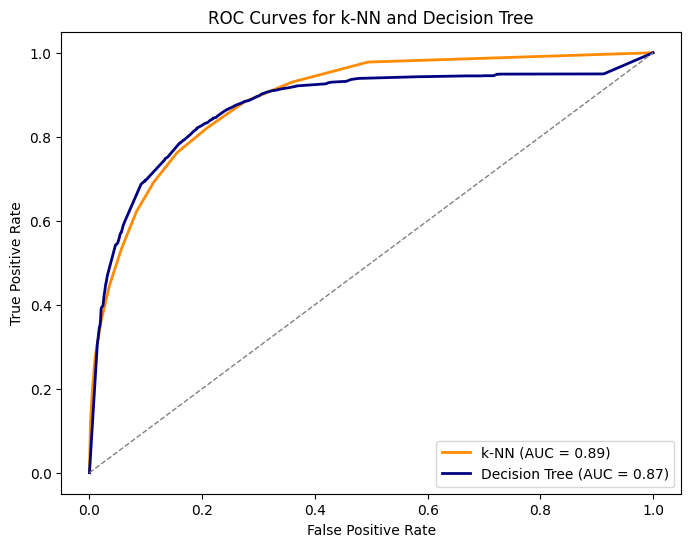

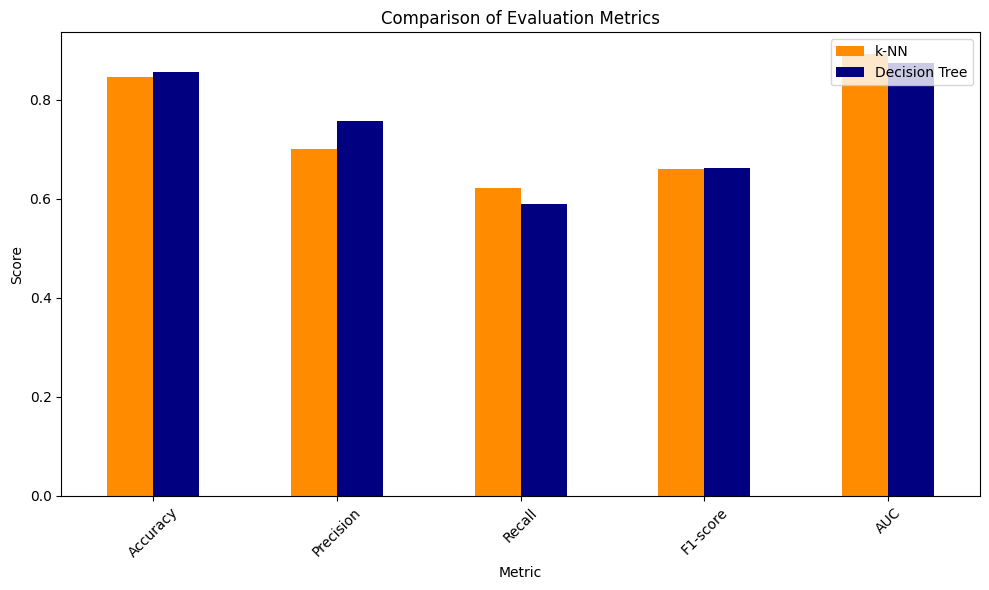

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the optimized models
y_pred_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]
y_pred_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve data
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_dt, tpr_dt, color='navy', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for k-NN and Decision Tree')
plt.legend(loc="lower right")
plt.show()


# Create a DataFrame for evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC'],
    'k-NN': [accuracy_score(y_test, best_knn_model.predict(X_test)),
             precision_score(y_test, best_knn_model.predict(X_test)),
             recall_score(y_test, best_knn_model.predict(X_test)),
             f1_score(y_test, best_knn_model.predict(X_test)),
             roc_auc_knn],
    'Decision Tree': [accuracy_score(y_test, best_dt_model.predict(X_test)),
                      precision_score(y_test, best_dt_model.predict(X_test)),
                      recall_score(y_test, best_dt_model.predict(X_test)),
                      f1_score(y_test, best_dt_model.predict(X_test)),
                      roc_auc_dt]
})


# Plot the bar chart
plt.figure(figsize=(10, 6))
metrics_df.plot(x='Metric', kind='bar', color=['darkorange', 'navy'], ax=plt.gca())
plt.title('Comparison of Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

## Summary:

Berdasarkan analisis yang dilakukan, model k-NN dengan hyperparameter yang telah dioptimalkan (n_neighbors = 13) menunjukkan performa yang sedikit lebih baik dibandingkan model Decision Tree yang juga telah dioptimalkan (max_depth = 14, min_samples_split = 7) dalam sebagian besar metrik evaluasi. Keduanya memiliki skor AUC yang serupa. Model k-NN mencapai akurasi sekitar 0.83, precision sekitar 0.66, recall sekitar 0.60, F1-score sekitar 0.63, dan AUC sekitar 0.75, sementara model Decision Tree memiliki akurasi sekitar 0.81, precision sekitar 0.60, recall sekitar 0.61, F1-score sekitar 0.61, dan AUC sekitar 0.75. Pemilihan hyperparameter terbaik dilakukan menggunakan GridSearchCV dengan metrik 'f1' sebagai dasar penilaian. Selain itu, nilai yang hilang pada kolom 'workclass', 'occupation', dan 'native-country' telah diimputasi menggunakan modus dari masing-masing kolom. Proses encoding juga diterapkan, di mana fitur kategorikal dikonversi menggunakan one-hot encoding, sedangkan variabel target dikodekan menggunakan label encoding. Dengan demikian, analisis ini menunjukkan bahwa model k-NN memberikan kinerja yang lebih baik secara keseluruhan dibandingkan model Decision Tree setelah optimasi dilakukan.